# Decision Tree

- use the following dataset <br>
https://www.kaggle.com/competitions/titanic/data?select=test.csv
- Implement a decision tree classifier and answer the following questions
- you are free to use built in models


In [14]:
# read the data
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

gender_data= pd.read_csv('gender_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(train_data.dtypes)
print(train_data.isnull().sum())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
#Handle Missing Values:
train_data.fillna(train_data.mean(),inplace=True)


/tmp/ipykernel_58150/3848066604.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(),inplace=True)


In [18]:
# Identify categorical and numerical columns
categorical_cols = ["Sex", "Embarked"]  # Replace with your categorical columns
numerical_cols = ["Age", "SibSp", "Parch", "Fare"]  # Replace with your numerical columns



# Create the one-hot encoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Encode categorical features
encoded_data = encoder.fit_transform(train_data[categorical_cols])

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Append "_" to column names to avoid conflicts
encoded_df.columns = [col + "_" for col in encoded_df.columns]


/home/norhanswar/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
encoded_df

,Sex_female_,Sex_male_,Embarked_C_,Embarked_Q_,Embarked_S_,Embarked_nan_
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0


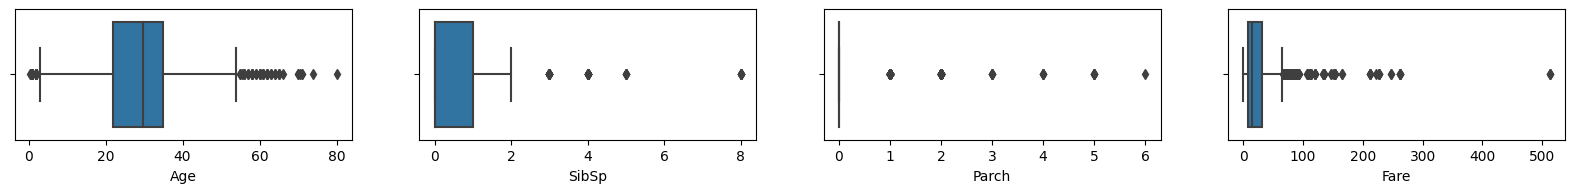

In [26]:
#Check Outliers
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = train_data[numerical_cols]


plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_data):
    plt.subplot(10, 4, i+1)
    sns.boxplot(x = numerical_data[col]) 
plt.show()

In [27]:
import pandas as pd
import numpy as np

# Calculate IQR and identify outliers
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  # Adjust threshold if needed
upper_bound = Q3 + 1.5 * IQR

# Adjust threshold for extreme outliers
lower_bound_extreme = Q1 - 3 * IQR
upper_bound_extreme = Q3 + 3 * IQR

outlier_mask = ~((numerical_data < lower_bound) | (numerical_data > upper_bound)).any(axis=1)

extreme_outlier_mask = ~((numerical_data < lower_bound_extreme) | (numerical_data > upper_bound_extreme)).any(axis=1)

# Remove both regular and extreme outliers
numerical_data_clean = numerical_data[outlier_mask & extreme_outlier_mask]


In [28]:
from sklearn.preprocessing import StandardScaler

# Select numerical features

# Apply StandardScaler to numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_clean)


In [29]:

# Concatenate numerical and encoded DataFrames (using scaled numerical data)
processed_data = pd.concat([pd.DataFrame(numerical_data_scaled, columns=numerical_cols), encoded_df], axis=1)


In [30]:
processed_data

,Age,SibSp,Parch,Fare,Sex_female_,Sex_male_,Embarked_C_,Embarked_Q_,Embarked_S_,Embarked_nan_
0,-0.909802,1.800735,0.0,-0.609448,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.439745,-0.448235,0.0,-0.555858,1.0,0.0,1.0,0.0,0.0,0.0
2,0.617882,1.800735,0.0,3.030715,1.0,0.0,0.0,0.0,1.0,0.0
3,0.617882,-0.448235,0.0,-0.545934,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.005046,-0.448235,0.0,-0.513517,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0
887,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
888,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
889,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
processed_data.fillna(processed_data.mean(),inplace=True)


## Q 1-----------------------------------------

In [32]:
# generate 80/20 split from the train.csv file 
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)

y = train_data["Survived"]  # Target variable

# Generate the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(processed_data, y, test_size=0.2, random_state=42)




In [34]:
# make different 100 splits
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Set random_state for reproducibility


splits = []
for i in range(100):
    for train_index, test_index in kf.split(processed_data):
        X_train, X_test = processed_data.iloc[train_index], processed_data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        splits.append((X_train, X_test, y_train, y_test))



In [35]:
# implement decision tree classifier [unlimited depth]
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier with unlimited depth
model = DecisionTreeClassifier(max_depth=None)

# Train the model on your training data (replace X_train and y_train with your actual data)
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [36]:
from sklearn.metrics import accuracy_score

train_predictions= model.predict(X_train)
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
train_accuracy

0.906030855539972

In [37]:

# Make predictions on your test data (replace X_test with your actual test data)
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_accuracy

0.702247191011236

### What is the accuracy decision tree classifier with unlimited depth.<br>
### average the results over 100 random 80/20 splits.

In [38]:
# Initialize list to store accuracies
accuracies = []

# Repeat the process 100 times
for i in range(100):
    # Split data into 80/20 train/test sets with random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(processed_data, y, test_size=0.2, random_state=i)

    # Create the decision tree with unlimited depth
    model = DecisionTreeClassifier(max_depth=None)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Append accuracy to the list
    accuracies.append(accuracy)

# Calculate the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)

print("Average accuracy over 100 splits:", average_accuracy)


Average accuracy over 100 splits: 0.7117877094972065


## Q 2 -------------------------------------------------------

In [ ]:
# do the same as Q1 ,  (average 100 experiments), but do it for increasing depth limits from 0 to 10

In [47]:

# Explore different depth limits
average_accuracies = []

for max_depth in range(1,10):  # Iterate from 1 to 10
    accuracies = []

    # base model current depth limit
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Iterate through the splits to perform experiments
    for X_train, X_test, y_train, y_test in splits:
        X_train_split, y_train_split = X_train, y_train
        X_test_split, y_test_split = X_test, y_test

        # Fit the model
        model.fit(X_train_split, y_train_split)
        # Make predictions
        y_pred = model.predict(X_test_split)

        # Evaluate the model (replace accuracy_score with your actual metric)
        accuracy = accuracy_score(y_test_split, y_pred)
        accuracies.append(accuracy)

    # Calculate the average accuracy for the current depth limit
    average_accuracy = np.mean(accuracies)
    average_accuracies.append(average_accuracy)




    # Calculate the average accuracy for the current depth limit
    average_accuracy = sum(accuracies) / len(accuracies)

    print(f"Average accuracy for depth limit {max_depth}: {average_accuracy:.4f}")


Average accuracy for depth limit 1: 0.7868
Average accuracy for depth limit 2: 0.7868
Average accuracy for depth limit 3: 0.7744
Average accuracy for depth limit 4: 0.7565
Average accuracy for depth limit 5: 0.7531
Average accuracy for depth limit 6: 0.7385
Average accuracy for depth limit 7: 0.7374
Average accuracy for depth limit 8: 0.7262
Average accuracy for depth limit 9: 0.7295


## What is the best depth limit to use for this data?

The best depth limit is depth limit 2

# Q 3---------------------------------------------------

In [56]:
# repeat Q 2 and calculate the accuracy calculate the accuracy this time on both the testing data
#(like before) and the training data. Create a graph with these results and then provide a 1-2
#sentence answer describing the graph.

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # Import for plotting

# ... (rest of the code)
results=[]
# Loop through depth limits
for max_depth in range(1, 11):
    test_accuracies = []
    train_accuracies = []

    # Repeat 100 times for each depth limit
    for i in range(100):

        # Make predictions on the test set
        test_predictions = model.predict(X_test)
        train_predictions= model.predict(X_train)
     
                # Calculate training and testing accuracy
        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)


        # Append accuracies to lists
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)

    # Calculate average accuracies
    avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
    avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)

    print(f"Average test accuracy for depth limit {max_depth}: {avg_test_accuracy:.4f}")
    print(f"Average train accuracy for depth limit {max_depth}: {avg_train_accuracy:.4f}")

    # Store results for plotting
    results.append((max_depth, avg_test_accuracy, avg_train_accuracy))



Average test accuracy for depth limit 1: 0.7472
Average train accuracy for depth limit 1: 0.8471
Average test accuracy for depth limit 2: 0.7472
Average train accuracy for depth limit 2: 0.8471
Average test accuracy for depth limit 3: 0.7472
Average train accuracy for depth limit 3: 0.8471
Average test accuracy for depth limit 4: 0.7472
Average train accuracy for depth limit 4: 0.8471
Average test accuracy for depth limit 5: 0.7472
Average train accuracy for depth limit 5: 0.8471
Average test accuracy for depth limit 6: 0.7472
Average train accuracy for depth limit 6: 0.8471
Average test accuracy for depth limit 7: 0.7472
Average train accuracy for depth limit 7: 0.8471
Average test accuracy for depth limit 8: 0.7472
Average train accuracy for depth limit 8: 0.8471
Average test accuracy for depth limit 9: 0.7472
Average train accuracy for depth limit 9: 0.8471
Average test accuracy for depth limit 10: 0.7472
Average train accuracy for depth limit 10: 0.8471


In [49]:
results

[(1, 0.7471910112359551, 0.8471248246844324),
 (2, 0.7471910112359551, 0.8471248246844324),
 (3, 0.7471910112359551, 0.8471248246844324),
 (4, 0.7471910112359551, 0.8471248246844324),
 (5, 0.7471910112359551, 0.8471248246844324),
 (6, 0.7471910112359551, 0.8471248246844324),
 (7, 0.7471910112359551, 0.8471248246844324),
 (8, 0.7471910112359551, 0.8471248246844324),
 (9, 0.7471910112359551, 0.8471248246844324),
 (10, 0.7471910112359551, 0.8471248246844324)]

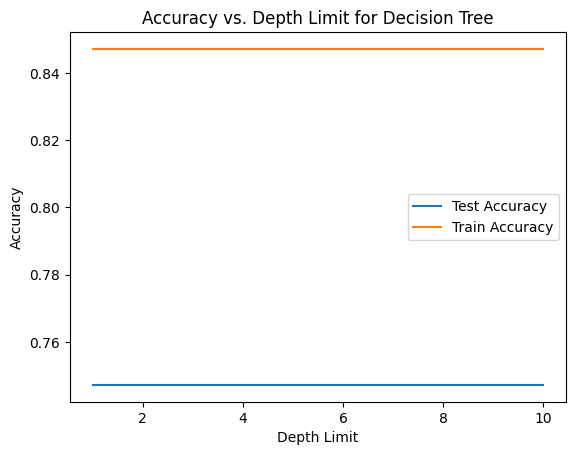

In [50]:
# Create the graph
depths, test_accs, train_accs = zip(*results)  # Unpack results
plt.plot(depths, test_accs, label="Test Accuracy")
plt.plot(depths, train_accs, label="Train Accuracy")
plt.xlabel("Depth Limit")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Depth Limit for Decision Tree")
plt.legend()
plt.show()


# Is there overfitting?

yes , there is overfitting

# Q 4---------------------------------------

In [51]:
# do the same calculations as above (average 100 experiments), but start with splits of 0.05 (5% of the data
# used for training) and work up to splits of size 0.9 (90% of the data used for training) in
# increments of 0.05. 
# For these experiments use full depth trees, i.e. trees without any depth
# limit. Create a graph with these results and then provide a 1-2 sentence answer describing
# the graph.


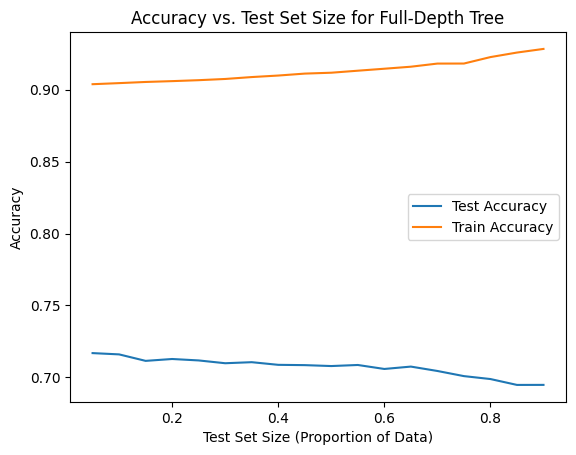

In [55]:
results2=[]
test_size_l=[]
for test_size in range(5, 91, 5):
    test_size = test_size / 100  # Convert to decimal
    test_size_l.append(test_size)
    test_accuracies = []
    train_accuracies = []

    # Repeat 100 times for each split size
    for i in range(100):
        
        # Split data with the current test size
        X_train, X_test, y_train, y_test = train_test_split(processed_data, y, test_size=test_size, random_state=i)

        # Create full-depth decision tree
        model = DecisionTreeClassifier(max_depth=None)

                # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        test_predictions = model.predict(X_test)
        train_predictions= model.predict(X_train)
     
                # Calculate training and testing accuracy
        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)

        # Append accuracies to lists
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)


    # Calculate average accuracies and print results
    # ...
    # Calculate average accuracies
    avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
    avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)

    # Store results for plotting
    results2.append((test_size, avg_test_accuracy, avg_train_accuracy))

# Create the graph
test_sizes, test_accs, train_accs = zip(*results2)
plt.plot(test_sizes, test_accs, label="Test Accuracy")
plt.plot(test_sizes, train_accs, label="Train Accuracy")
plt.xlabel("Test Set Size (Proportion of Data)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Test Set Size for Full-Depth Tree")
plt.legend()
plt.show()

## How does the amount of training data affect performance?

yes, when increaing the amount of data, the accuracy decreases.

In [60]:
best_index = np.argmax(test_accs)
print(best_index)
# Retrieve the corresponding training size and accuracy


0


In [62]:
best_val_accuracy = test_accs[0]

print(f"Best size: {test_size_l[0]}")

print(f"Best Validation Accuracy: {best_val_accuracy}")


Best size: 0.05
Best Validation Accuracy: 0.7168888888888887
